# Forecast Hydroloelectrical power energy using LSTM architecture

In [180]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

from datetime import datetime as dt
from IPython.display import Image, HTML
import pandas as pd
from datetime import datetime

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

from pandas.plotting import autocorrelation_plot

from sklearn.metrics import r2_score
import sklearn.metrics as metrics

from arcgis.gis import GIS
from arcgis.learn import TimeSeriesModel, prepare_tabulardata
from arcgis.features import FeatureLayer, FeatureLayerCollection

## Login ArcGIS online

In [ ]:
# Prompt user to provide username and password
import getpass
username = input('Enter username: ')
password = getpass.getpass("Enter your password: ") 
gis = GIS("https://udistritalfjc.maps.arcgis.com/home", username, password)

## One-step multivariate forecasting

### Train - Test split of timeseries dataset

In [181]:
#Capivara
test_size = 1582
Train_capivara, test_capivara = train_test_split(Series_Capivara_df, test_size=test_size, shuffle=False)
#Chavantes
test_size = 1582
Train_chavantes, test_chavantes = train_test_split(Series_Chavantes_df, test_size=test_size, shuffle=False)
#Jurumirim
test_size = 1582
Train_jurumirim, test_jurumirim = train_test_split(Series_Jurumirim_df, test_size=test_size, shuffle=False)

### Autocorrelation plot 

#### Capivara 

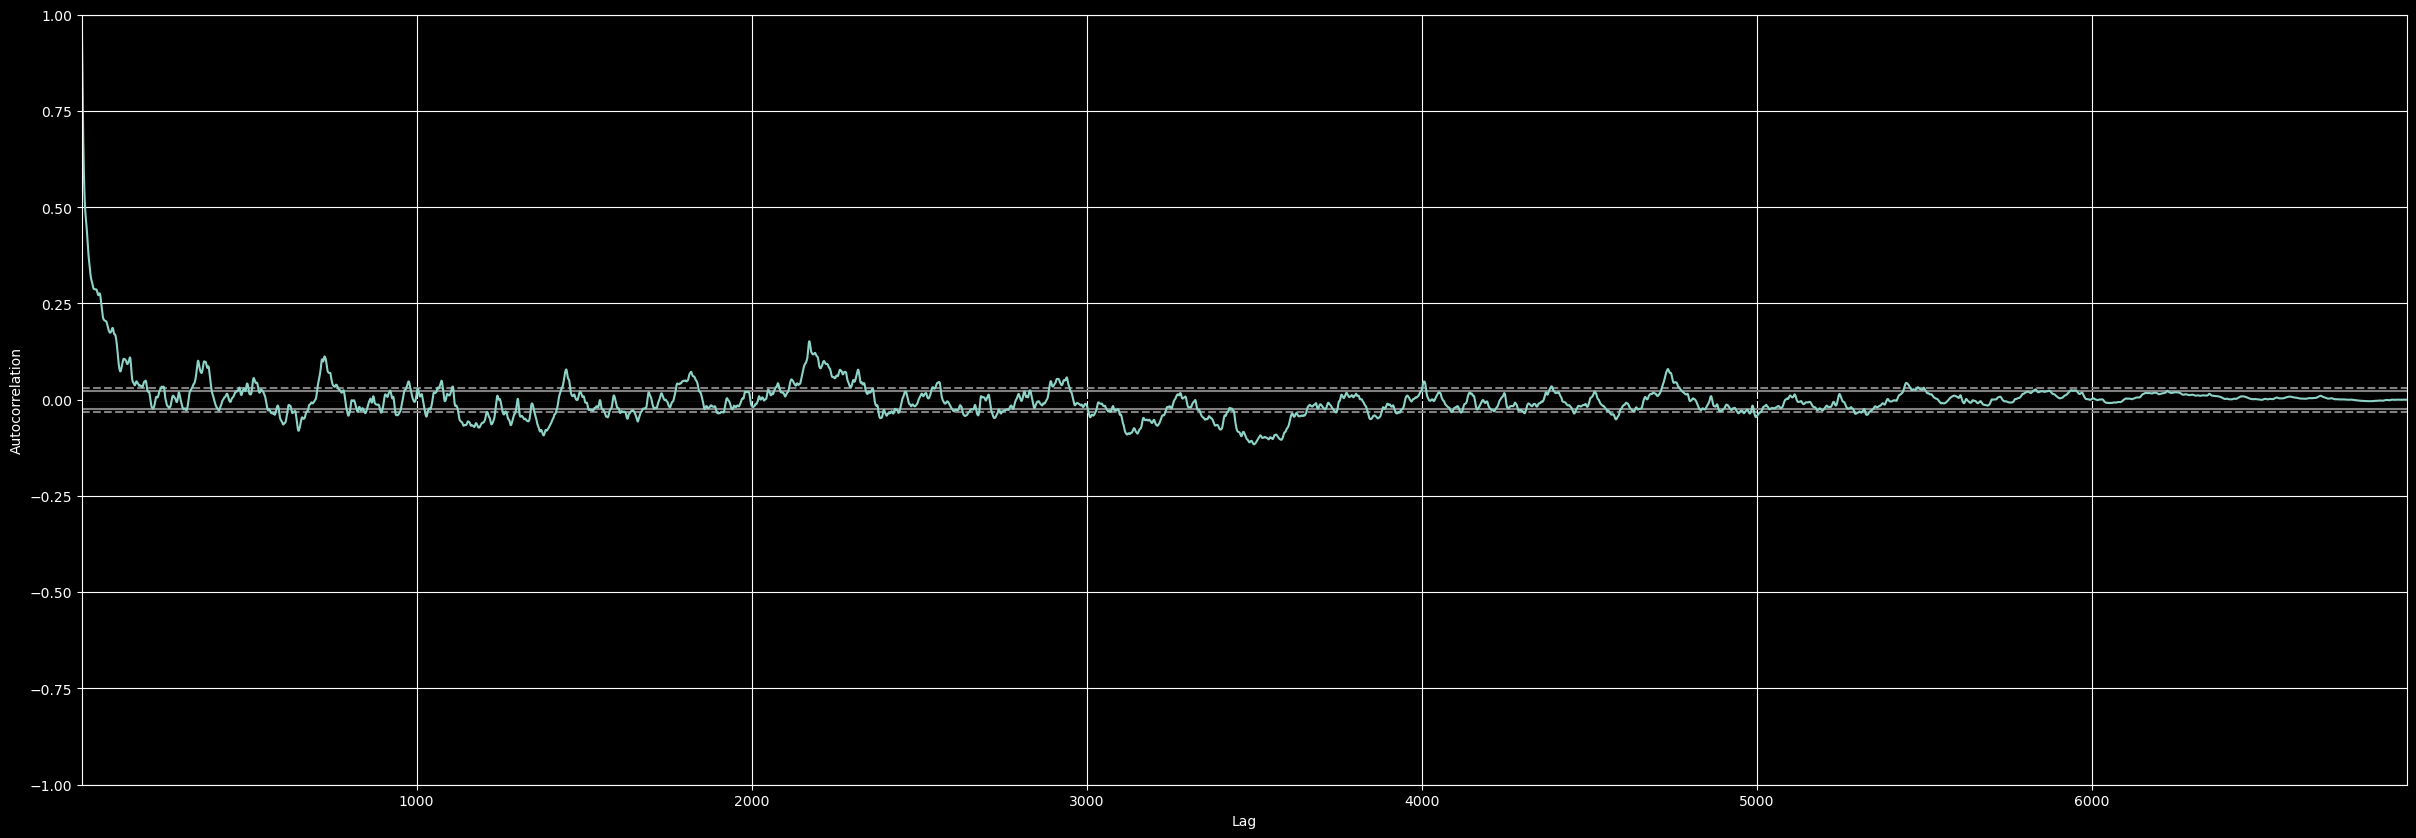

In [151]:
plt.figure(figsize=(30,10))
autocorrelation_plot(Train_capivara["AffluentNaturalEnergy"])
plt.show()

#### Chavantes 

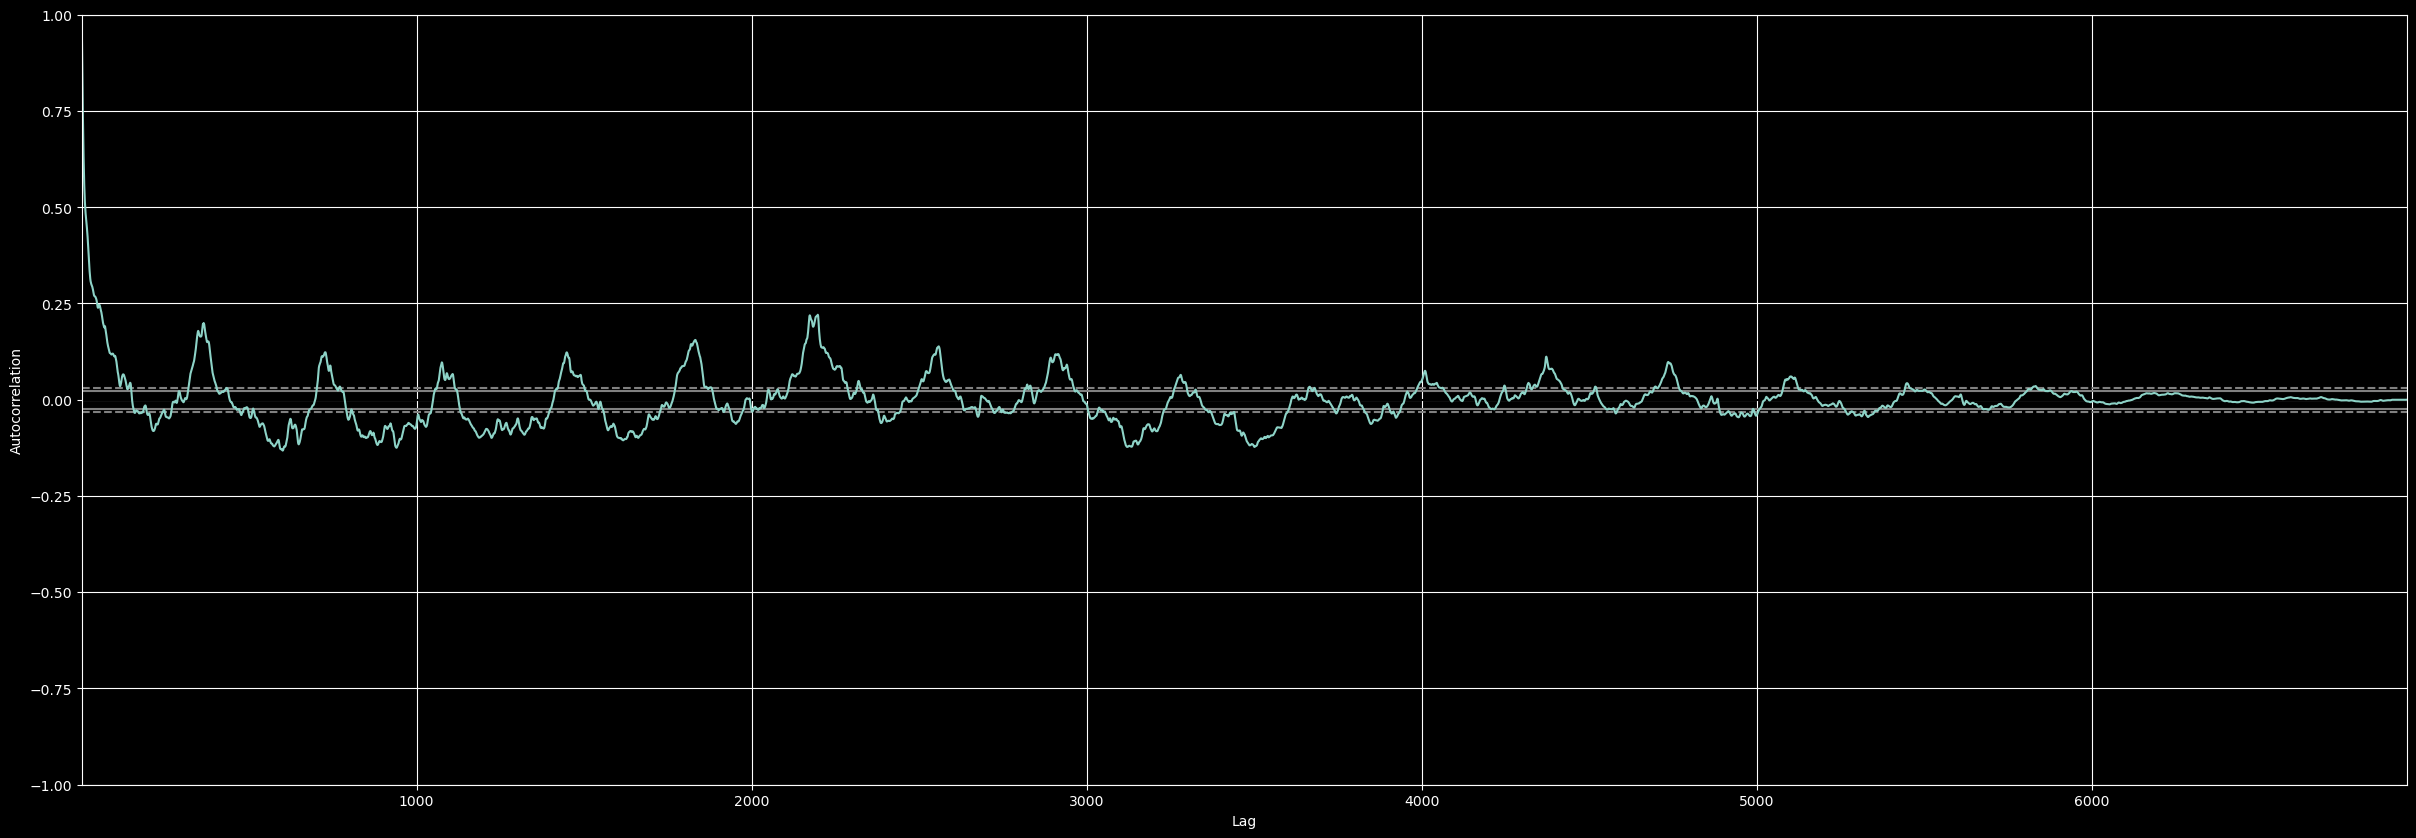

In [152]:
plt.figure(figsize=(30,10))
autocorrelation_plot(Train_chavantes["AffluentNaturalEnergy"])
plt.show()

#### Jurumirim 

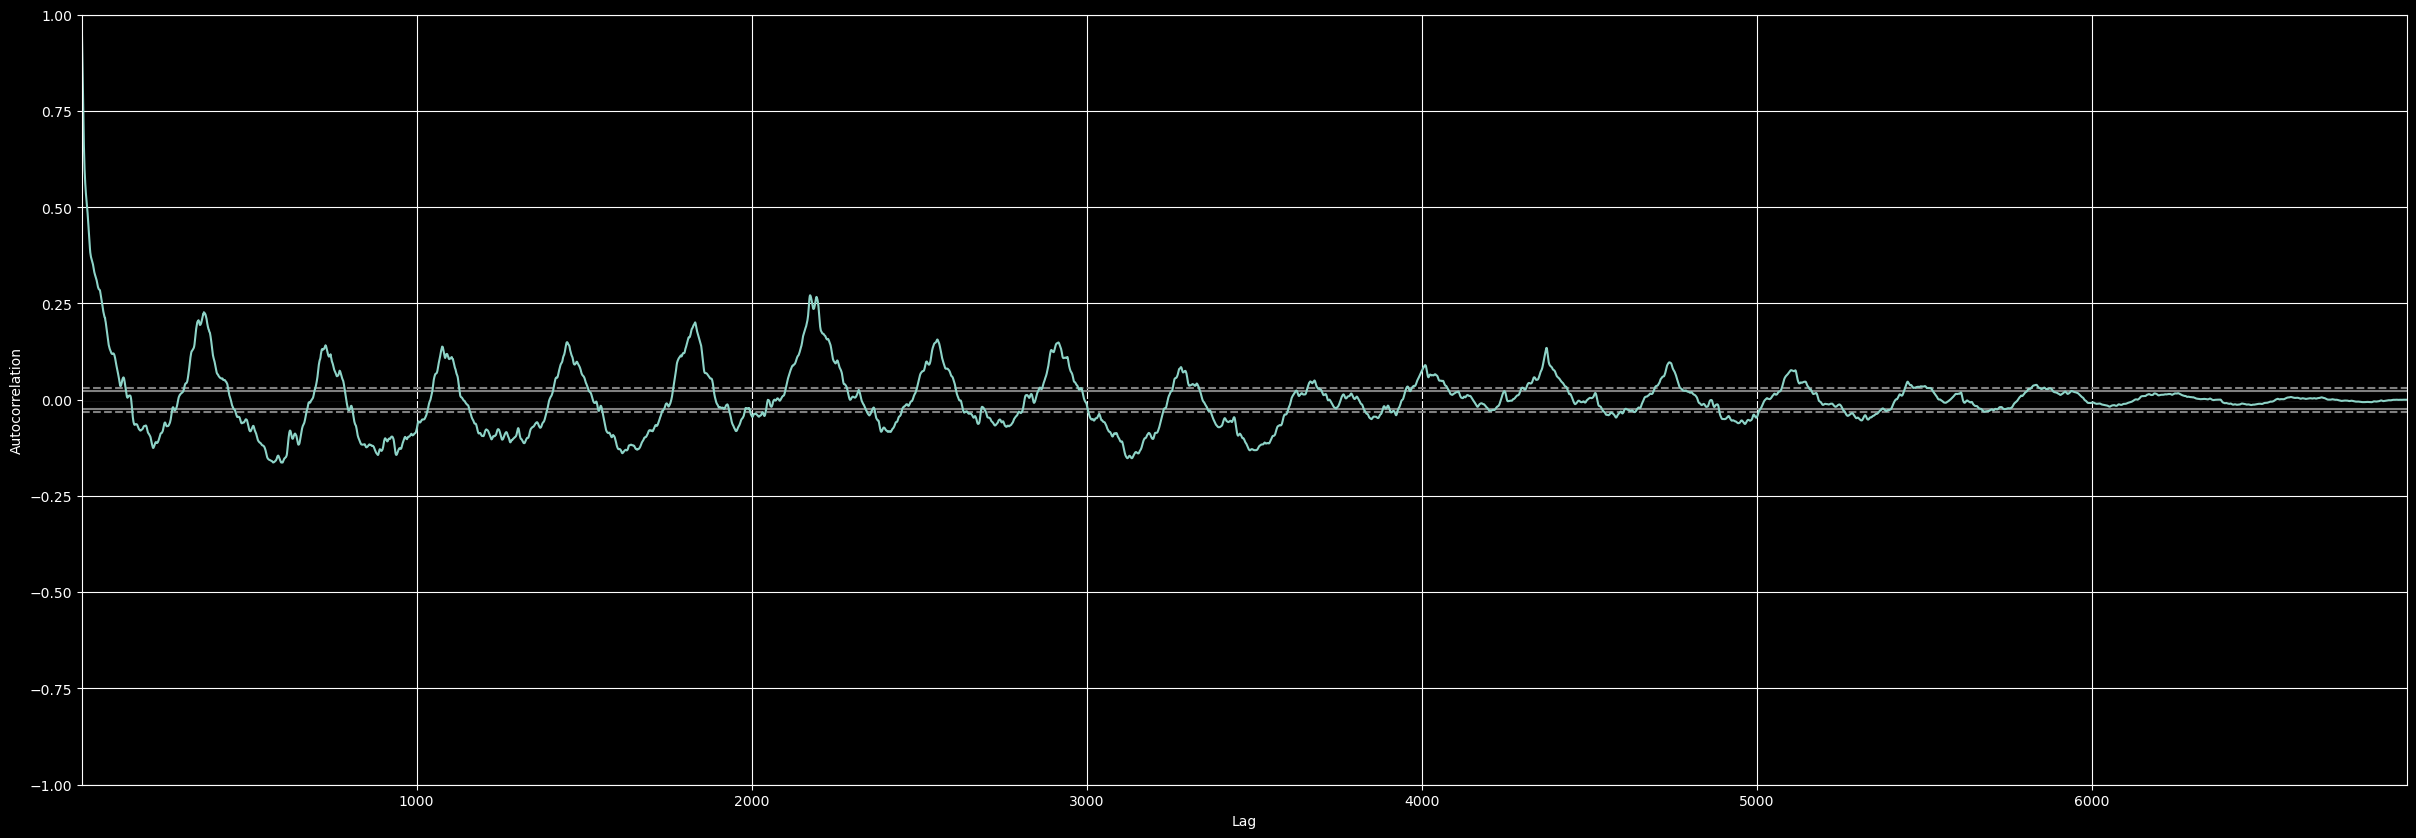

In [153]:
plt.figure(figsize=(30,10))
autocorrelation_plot(Train_jurumirim["AffluentNaturalEnergy"])
plt.show()

## Model building

### Data preparation 

In [154]:
Train_capivara.columns

Index(['AffluentFlow', 'DefluentFlow', 'NaturalFlow', 'AffluentNaturalEnergy',
       'Date'],
      dtype='object')

### One step univariate

In [156]:
preprocessors_capivara = [("AffluentNaturalEnergy", MinMaxScaler())]
data_capivara = prepare_tabulardata(Train_capivara, 
                           variable_predict="AffluentNaturalEnergy",
                           index_field="Date", 
                           preprocessors=preprocessors_capivara)

preprocessors_chavantes = [("AffluentNaturalEnergy", MinMaxScaler())]
data_chavantes = prepare_tabulardata(Train_chavantes, 
                           variable_predict="AffluentNaturalEnergy",
                           index_field="Date", 
                           preprocessors=preprocessors_chavantes)

preprocessors_jurumirim = [("AffluentNaturalEnergy", MinMaxScaler())]
data_jurumirim = prepare_tabulardata(Train_jurumirim, 
                           variable_predict="AffluentNaturalEnergy",
                           index_field="Date", 
                           preprocessors=preprocessors_jurumirim)

C:\Users\57320\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\learn\_utils\tabular_data.py:1871: UserWarning:

Dataframe is not spatial, Rasters and distance layers will not work

C:\Users\57320\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\learn\_utils\tabular_data.py:1871: UserWarning:

Dataframe is not spatial, Rasters and distance layers will not work

C:\Users\57320\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\learn\_utils\tabular_data.py:1871: UserWarning:

Dataframe is not spatial, Rasters and distance layers will not work



### Visualize the entire timeseries data

In [163]:
seq_len = 365

#### Capivara 

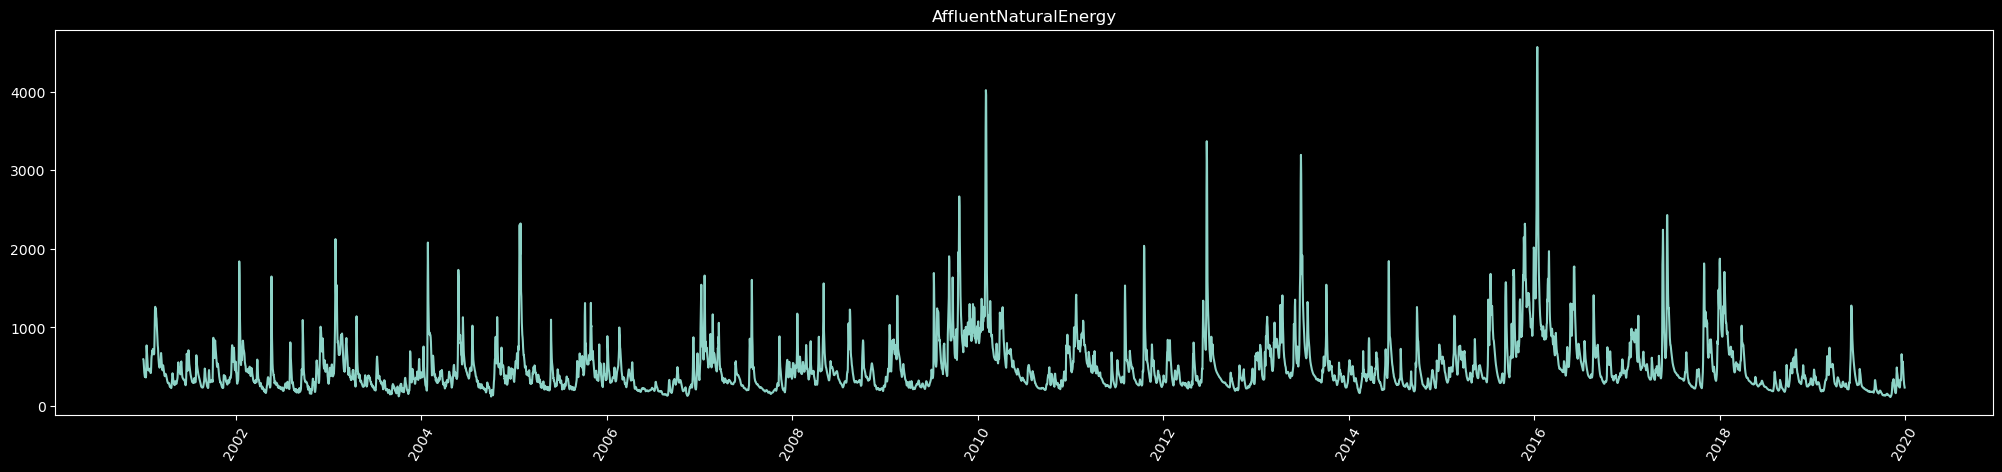

In [157]:
data_capivara.show_batch(graph=True)

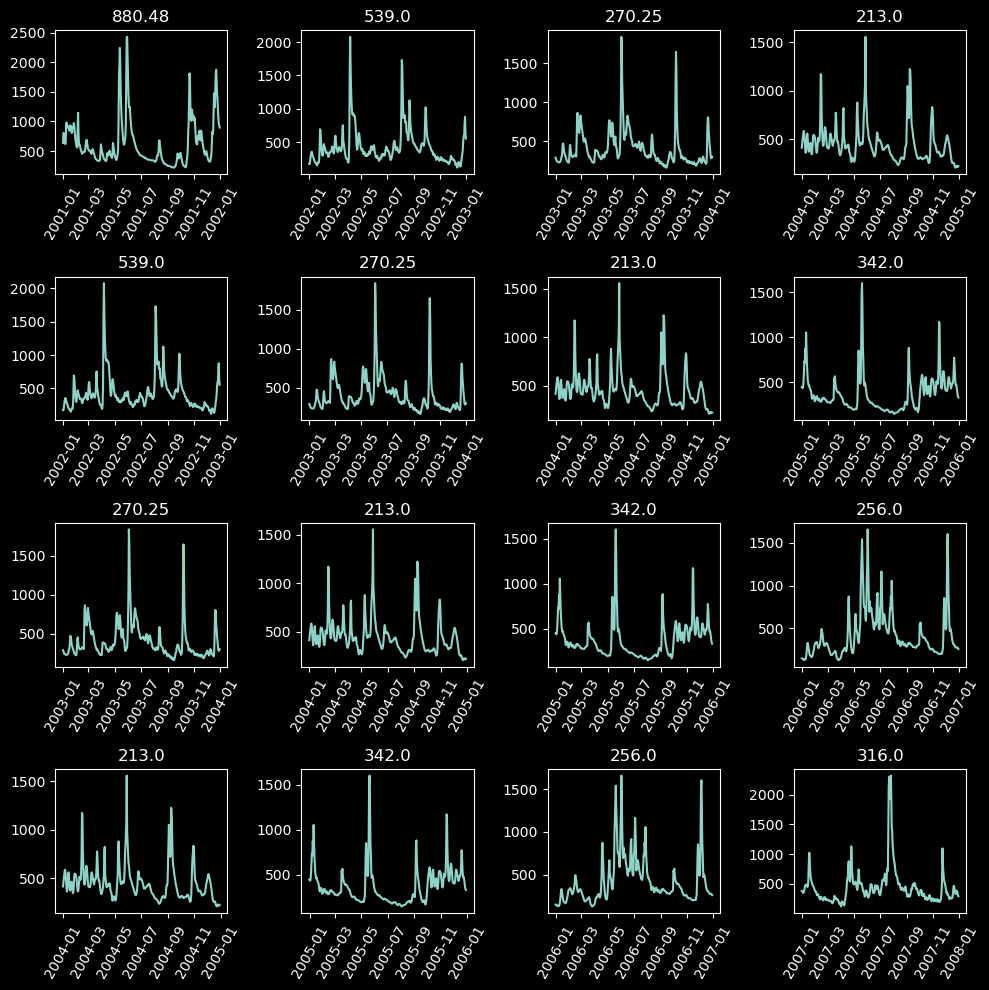

In [164]:
data_capivara.show_batch(rows=4,seq_len=seq_len)

#### Chavantes 

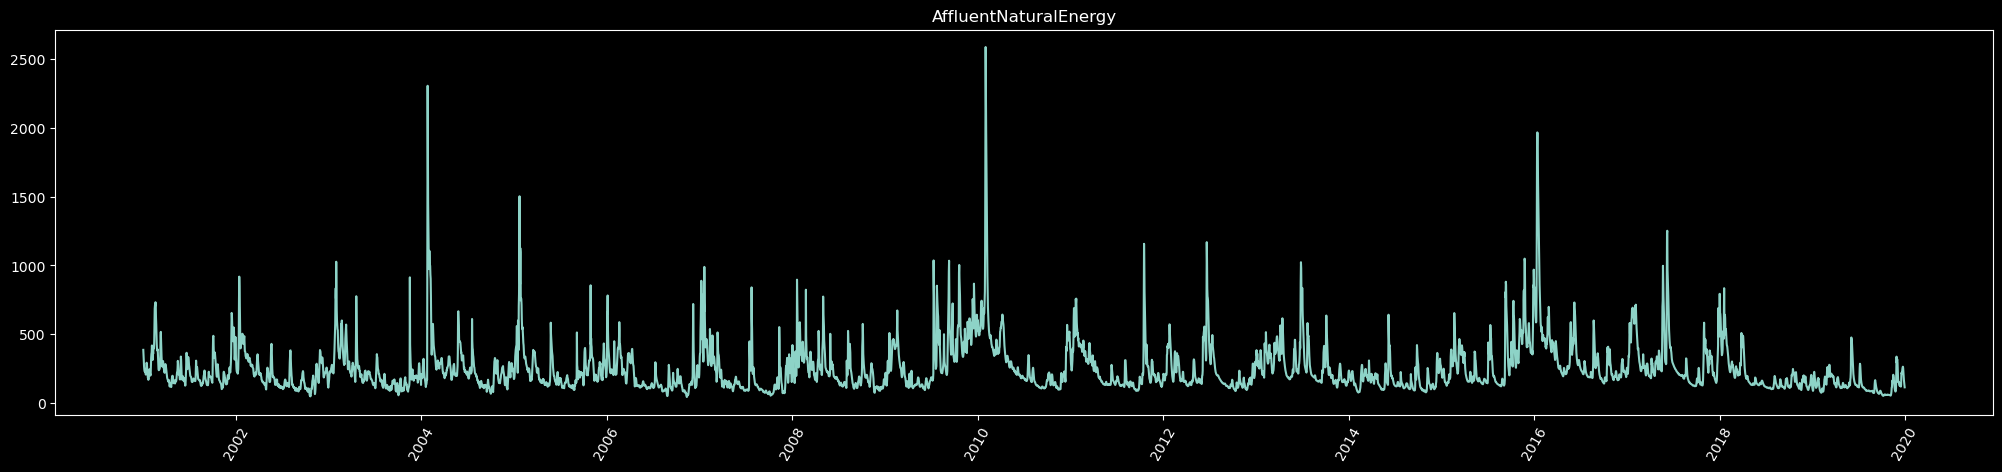

In [158]:
data_chavantes.show_batch(graph=True)

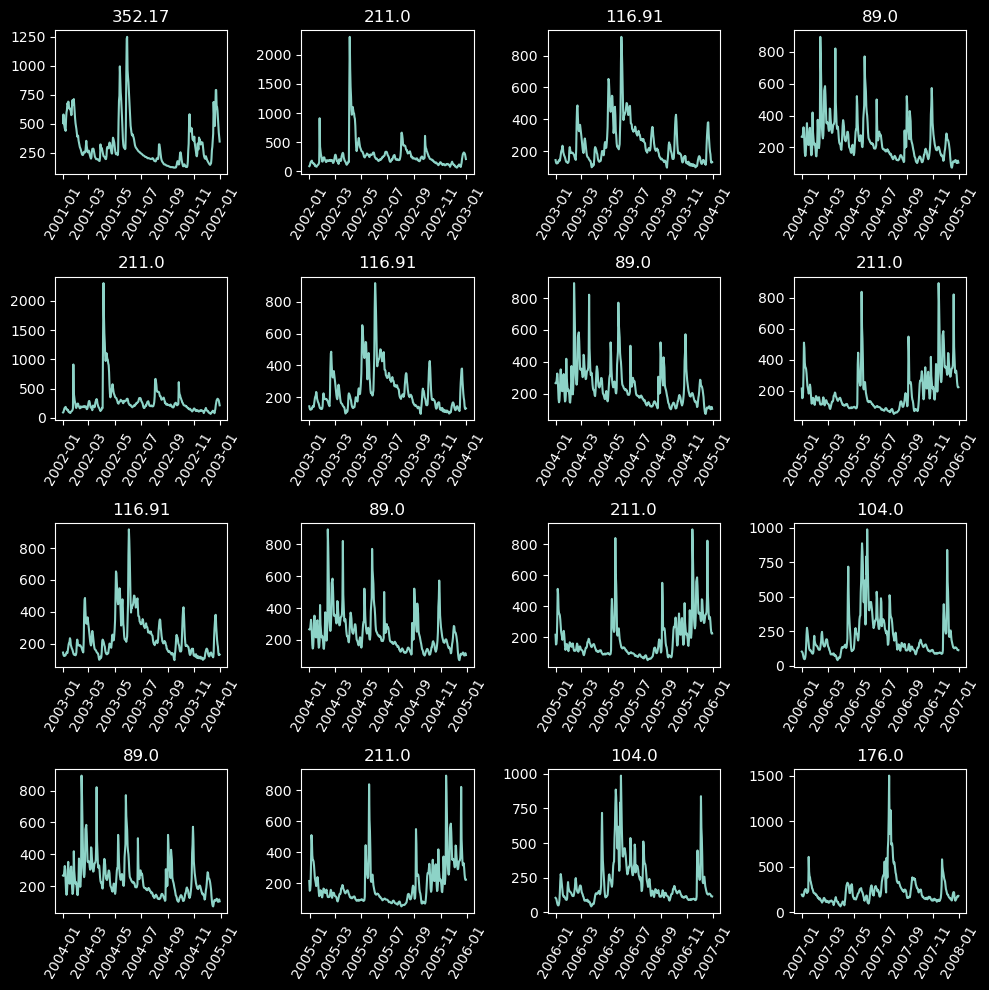

In [165]:
data_chavantes.show_batch(rows=4,seq_len=seq_len)

#### Jurumirim 

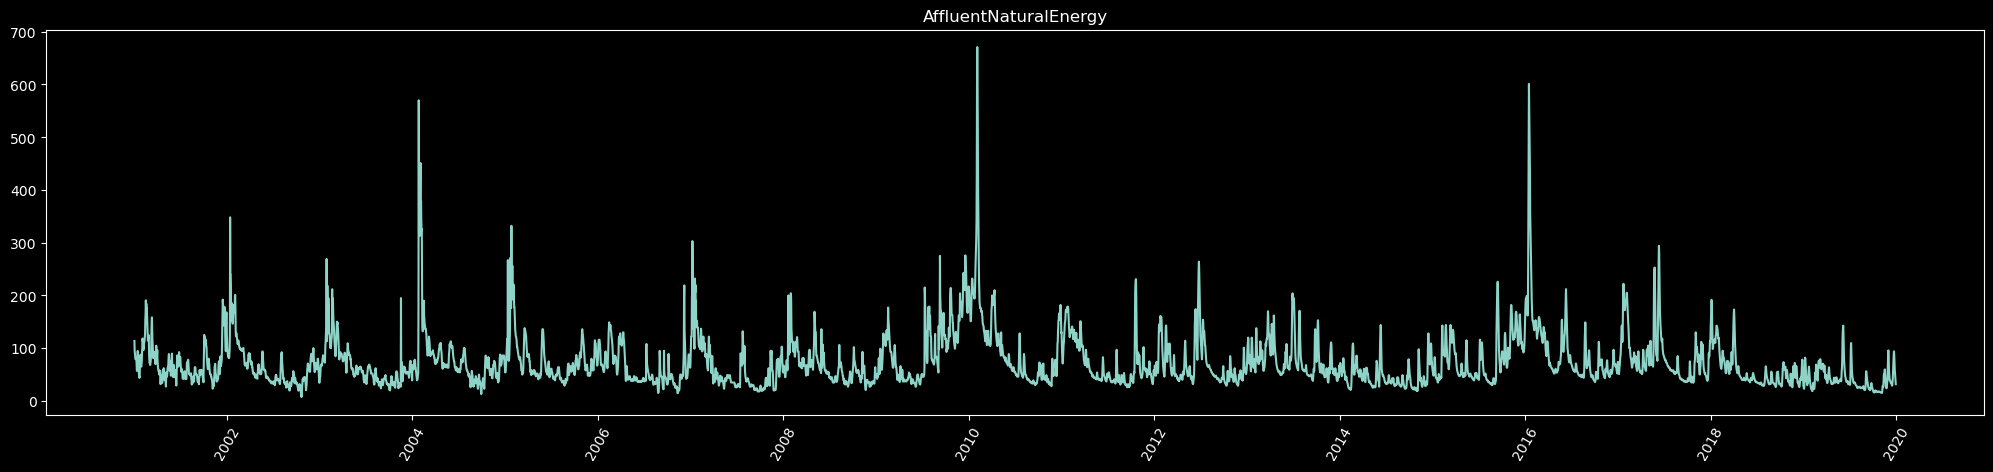

In [159]:
data_jurumirim.show_batch(graph=True)

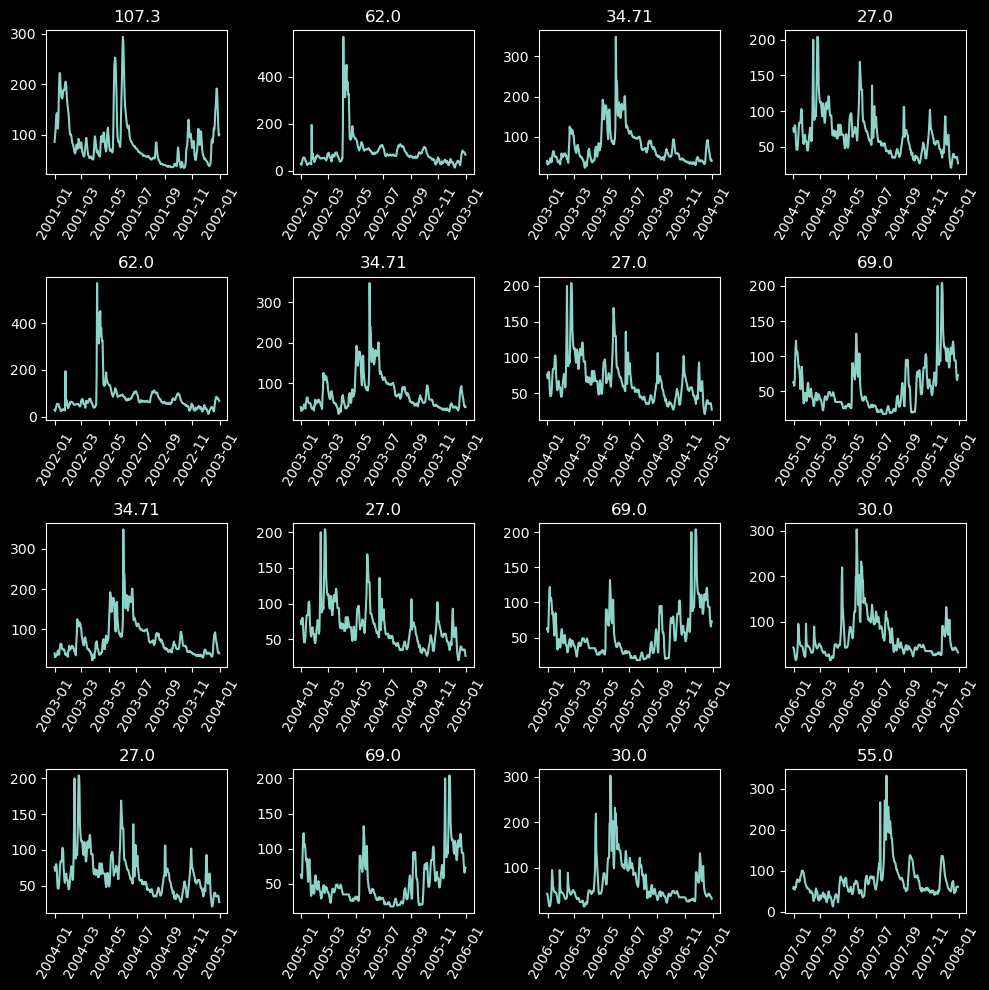

In [166]:
data_jurumirim.show_batch(rows=4,seq_len=seq_len)

## Model initialization

In [167]:
# In model initialization, the data and the backbone is selected 
ts_model_capivara = TimeSeriesModel(data_capivara, seq_len=seq_len, model_arch='LSTM',bidirectional=True)

# In model initialization, the data and the backbone is selected 
ts_model_chavantes = TimeSeriesModel(data_chavantes, seq_len=seq_len, model_arch='LSTM',bidirectional=True)

# In model initialization, the data and the backbone is selected 
ts_model_jurumirim = TimeSeriesModel(data_jurumirim, seq_len=seq_len, model_arch='LSTM',bidirectional=True)

## Learning rate search

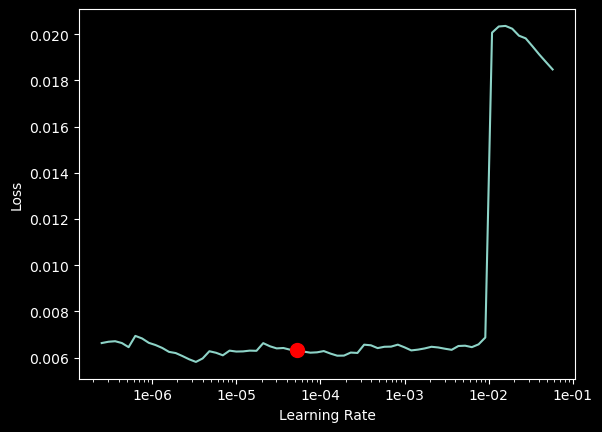

5.248074602497728e-05

In [168]:
l_rate_capivara = ts_model_capivara.lr_find()
l_rate_capivara

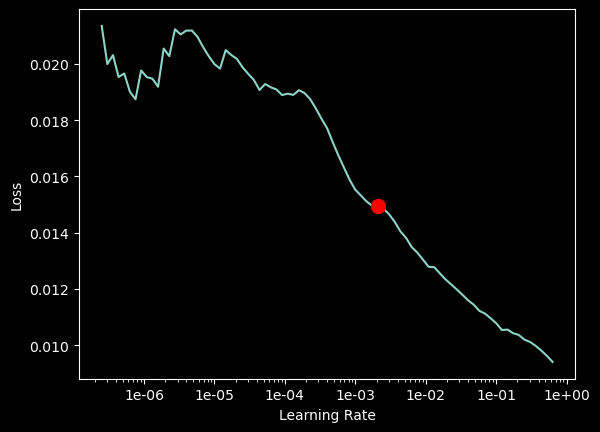

0.0020892961308540407

In [169]:
l_rate_chavantes = ts_model_chavantes.lr_find()
l_rate_chavantes

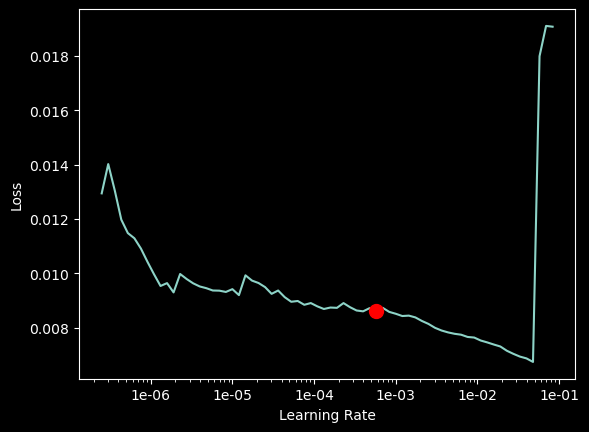

0.0005754399373371565

In [170]:
l_rate_jurumirim = ts_model_jurumirim.lr_find()
l_rate_jurumirim

## Model training 

In [217]:
ts_model_capivara.fit(10, lr=l_rate_capivara)
ts_model_capivara.score()

epoch     train_loss  valid_loss  time    
0         0.002037    0.002014    03:54     
1         0.002009    0.001981    03:17     
2         0.001966    0.001931    03:14     
3         0.002031    0.001884    03:10     
4         0.002001    0.001829    03:17     
5         0.001872    0.001783    03:14     
6         0.001914    0.001757    03:23     
7         0.001623    0.001742    03:28     
8         0.001702    0.001733    03:19     
9         0.001678    0.001732    03:09     


0.6595094742798338

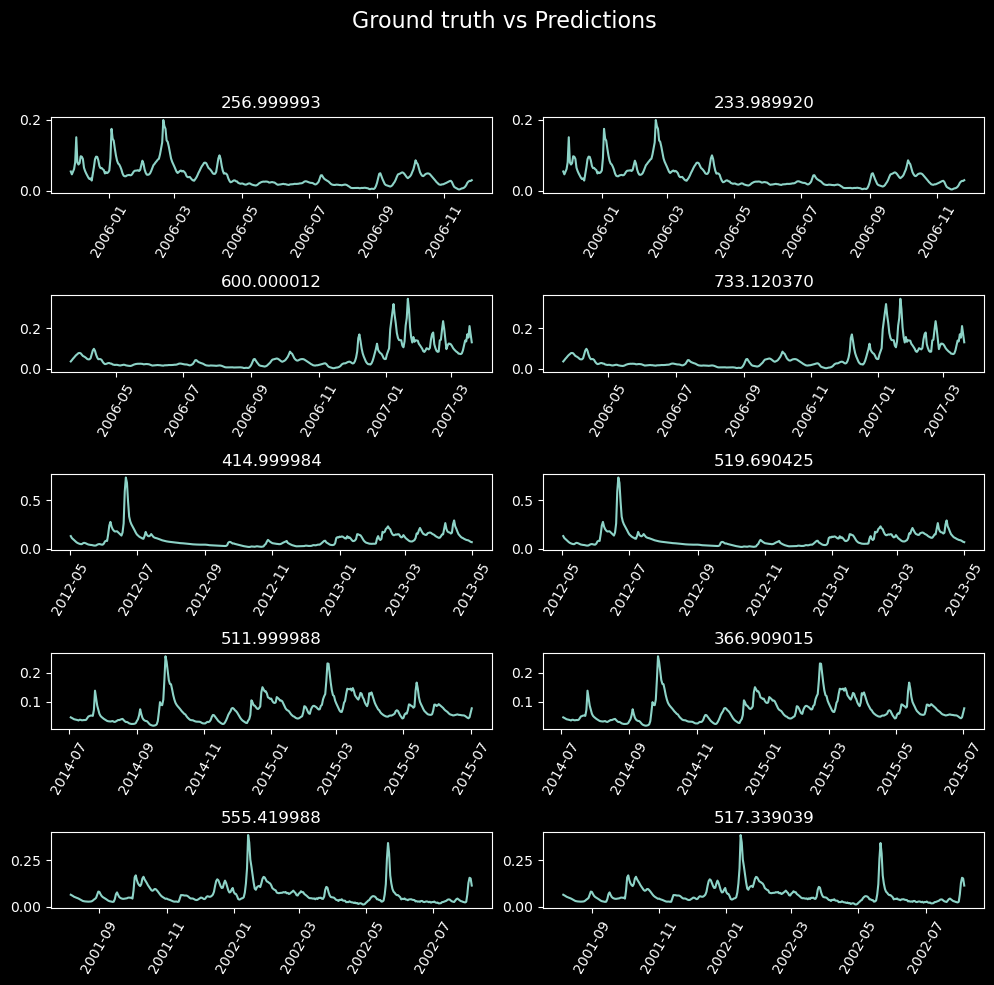

In [172]:
# the ground truth vs the predicted values by the trained model is visualized to check the quality of the trained model
ts_model_capivara.show_results(rows=5)

In [218]:
ts_model_chavantes.fit(10, lr=l_rate_chavantes)
ts_model_chavantes.score()

epoch     train_loss  valid_loss  time    
0         0.000487    0.000337    02:49     
1         0.000479    0.000414    03:33     
2         0.000491    0.000434    03:25     
3         0.000490    0.000349    03:32     
4         0.000480    0.000324    03:28     
5         0.000474    0.000303    03:33     
6         0.000504    0.000370    03:35     
7         0.000462    0.000335    02:52     
8         0.000462    0.000325    01:53     
9         0.000414    0.000326    01:53     


0.9275697672258577

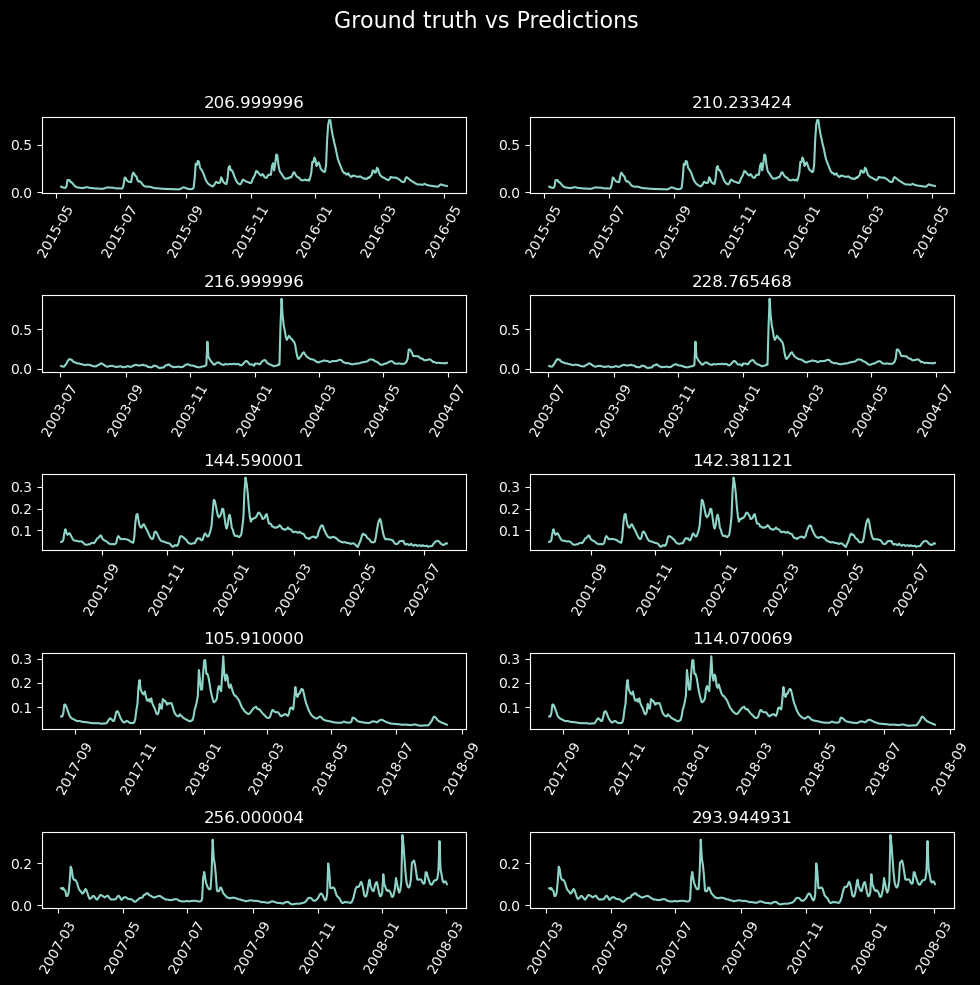

In [174]:
# the ground truth vs the predicted values by the trained model is visualized to check the quality of the trained model
ts_model_chavantes.show_results(rows=5)

In [219]:
ts_model_jurumirim.fit(10, lr=l_rate_jurumirim)
ts_model_jurumirim.score()

epoch     train_loss  valid_loss  time    
0         0.000502    0.000401    01:54     
1         0.000512    0.000405    01:54     
2         0.000474    0.000403    01:54     
3         0.000496    0.000484    01:53     
4         0.000572    0.000434    01:53     
5         0.000488    0.000477    01:53     
6         0.000458    0.000481    01:53     
7         0.000444    0.000509    01:53     
8         0.000438    0.000510    01:53     
9         0.000360    0.000506    01:54     


0.9128399519859037

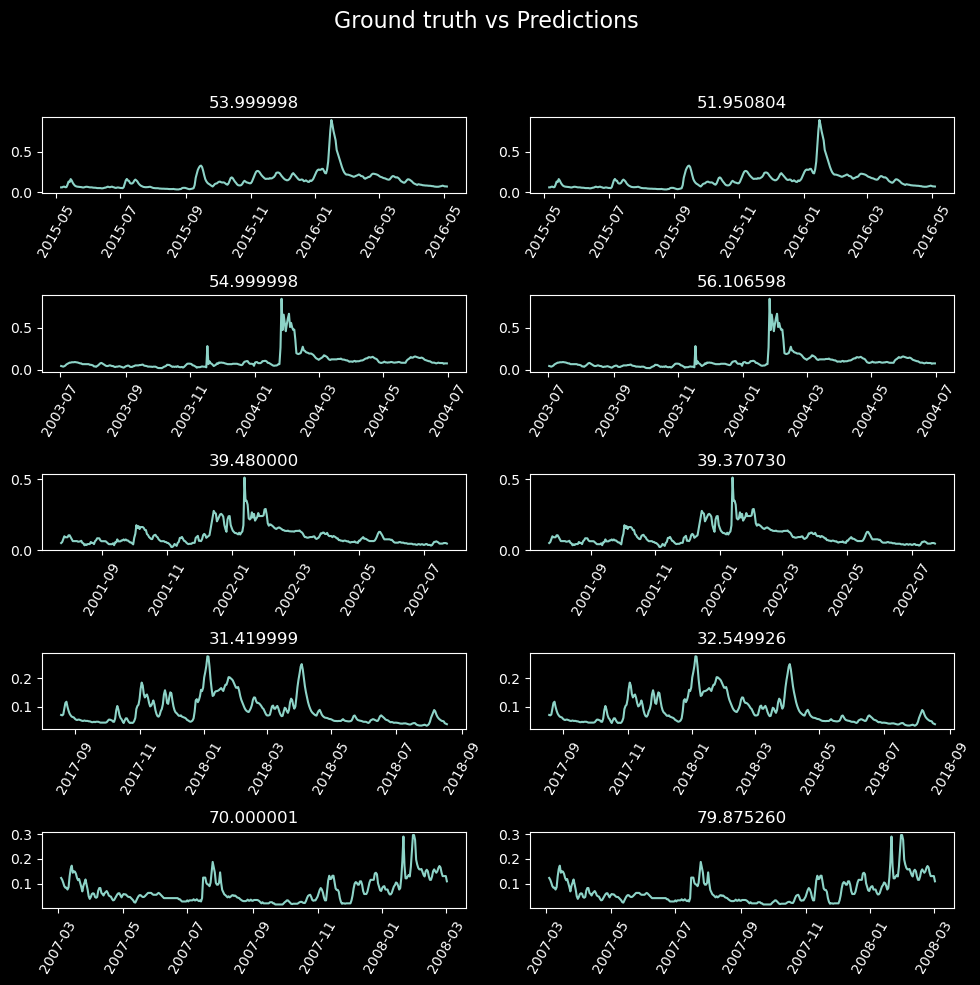

In [176]:
# the ground truth vs the predicted values by the trained model is visualized to check the quality of the trained model
ts_model_jurumirim.show_results(rows=5)

## Forecasting using the trained timeseries model

In [177]:
# Here the forecast is returned as a dataframe, since it is non spatial data, mentioned in the 'prediction_type'  
sdf_forecasted_univar_capivara = ts_model_capivara.predict(Train_capivara, prediction_type='dataframe', number_of_predictions=test_size)

# Here the forecast is returned as a dataframe, since it is non spatial data, mentioned in the 'prediction_type'  
sdf_forecasted_univar_chavantes = ts_model_chavantes.predict(Train_chavantes, prediction_type='dataframe', number_of_predictions=test_size)

# Here the forecast is returned as a dataframe, since it is non spatial data, mentioned in the 'prediction_type'  
sdf_forecasted_univar_jurumirim = ts_model_jurumirim.predict(Train_jurumirim, prediction_type='dataframe', number_of_predictions=test_size)


## Estimate model metric for actual vs. forecast validation

In [210]:
# Formating the forecasted result into actual vs the predicted columns
sdf_forecasted_capivara = sdf_forecasted_univar_capivara.tail(test_size).copy()
sdf_forecasted_capivara = sdf_forecasted_capivara[['Date','AffluentNaturalEnergy_results']]
sdf_forecasted_capivara['Actual_AffluentNaturalEnergy'] = test_capivara['AffluentNaturalEnergy'].values
sdf_forecasted_capivara = sdf_forecasted_capivara.set_index(sdf_forecasted_capivara.columns[0])

# Formating the forecasted result into actual vs the predicted columns
sdf_forecasted_chavantes = sdf_forecasted_univar_chavantes.tail(test_size).copy()
sdf_forecasted_chavantes = sdf_forecasted_chavantes[['Date','AffluentNaturalEnergy_results']]
sdf_forecasted_chavantes['Actual_AffluentNaturalEnergy'] = test_chavantes['AffluentNaturalEnergy'].values
sdf_forecasted_chavantes = sdf_forecasted_chavantes.set_index(sdf_forecasted_chavantes.columns[0])

# Formating the forecasted result into actual vs the predicted columns
sdf_forecasted_jurumirim = sdf_forecasted_univar_jurumirim.tail(test_size).copy()
sdf_forecasted_jurumirim = sdf_forecasted_jurumirim[['Date','AffluentNaturalEnergy_results']]
sdf_forecasted_jurumirim['Actual_AffluentNaturalEnergy'] = test_jurumirim['AffluentNaturalEnergy'].values
sdf_forecasted_jurumirim = sdf_forecasted_jurumirim.set_index(sdf_forecasted_jurumirim.columns[0])


In [192]:
# Bi-LSTM
r2_test_capivara = r2_score(sdf_forecasted_capivara['Actual_AffluentNaturalEnergy'],sdf_forecasted_capivara['AffluentNaturalEnergy_results'])
print('R-Square: ', round(r2_test_capivara, 2))

# Bi-LSTM
r2_test_chavantes = r2_score(sdf_forecasted_chavantes['Actual_AffluentNaturalEnergy'],sdf_forecasted_chavantes['AffluentNaturalEnergy_results'])
print('R-Square: ', round(r2_test_chavantes, 2))

# Bi-LSTM
r2_test_jurumirim = r2_score(sdf_forecasted_jurumirim['Actual_AffluentNaturalEnergy'],sdf_forecasted_jurumirim['AffluentNaturalEnergy_results'])
print('R-Square: ', round(r2_test_jurumirim, 2))

R-Square:  -0.94
R-Square:  -1.7
R-Square:  -0.1


In [201]:
sdf_forecasted_jurumirim

,AffluentNaturalEnergy_results,Actual_AffluentNaturalEnergy
Date,,
2020-01-01,31.406939,30.30
2020-01-02,30.879551,28.74
2020-01-03,31.410885,27.53
2020-01-04,32.224113,30.01
2020-01-05,33.100900,36.29
...,...,...
2024-04-26,31.833116,20.18
2024-04-27,31.833064,18.91
2024-04-28,31.833022,18.94


## Actual vs. forecast visualization

#### Capivara

In [211]:
#sdf_forecasted = sdf_forecasted.reset_index()
sdf_forecasted_capivara['Date'] = (sdf_forecasted_capivara.index).to_timestamp()
sdf_forecasted_capivara.set_index('Date', inplace=True)

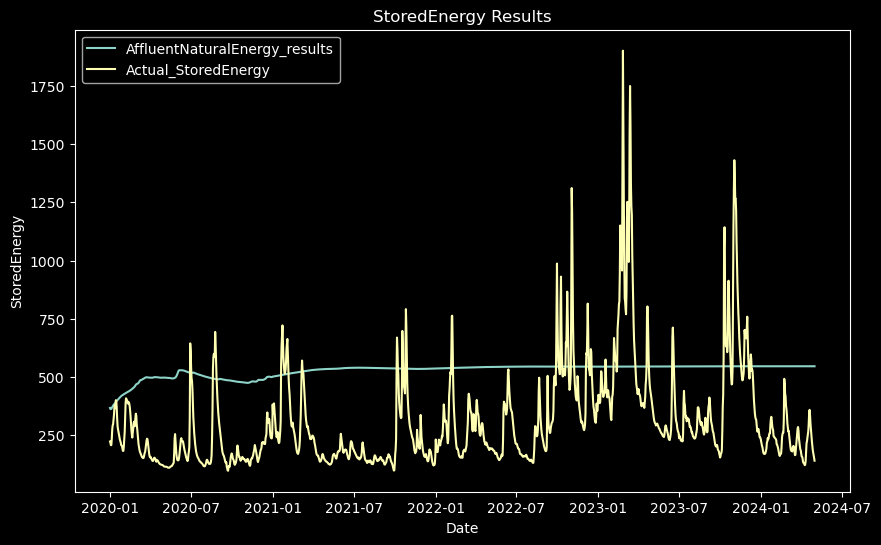

In [212]:
plt.figure(figsize=(10, 6))
plt.plot(sdf_forecasted_capivara.index, sdf_forecasted_capivara['AffluentNaturalEnergy_results'], label='AffluentNaturalEnergy_results')
plt.plot(sdf_forecasted_capivara.index, sdf_forecasted_capivara['Actual_AffluentNaturalEnergy'], label='Actual_StoredEnergy')
plt.xlabel('Date')
plt.ylabel('StoredEnergy')
plt.title('StoredEnergy Results')
plt.legend()
plt.show()

#### Chavantes 

In [213]:
#sdf_forecasted = sdf_forecasted.reset_index()
sdf_forecasted_chavantes['Date'] = (sdf_forecasted_chavantes.index).to_timestamp()
sdf_forecasted_chavantes.set_index('Date', inplace=True)

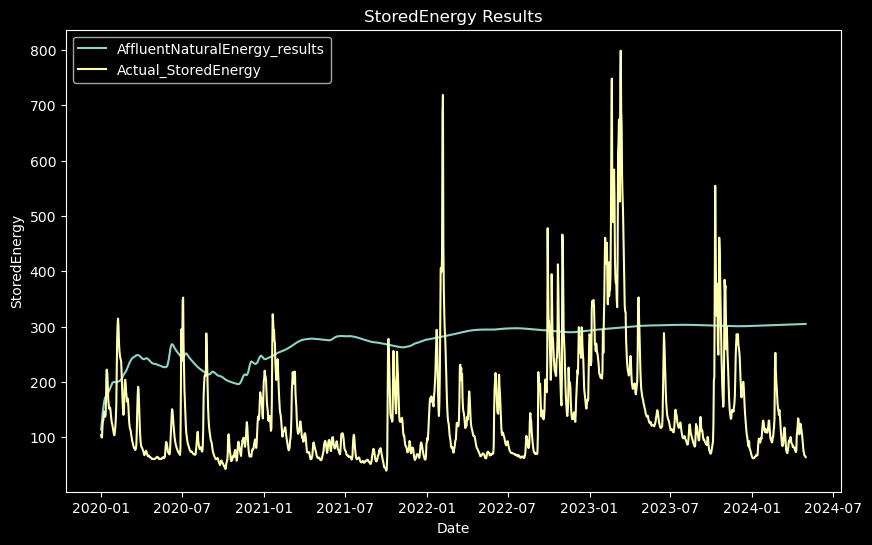

In [214]:
plt.figure(figsize=(10, 6))
plt.plot(sdf_forecasted_chavantes.index, sdf_forecasted_chavantes['AffluentNaturalEnergy_results'], label='AffluentNaturalEnergy_results')
plt.plot(sdf_forecasted_chavantes.index, sdf_forecasted_chavantes['Actual_AffluentNaturalEnergy'], label='Actual_StoredEnergy')
plt.xlabel('Date')
plt.ylabel('StoredEnergy')
plt.title('StoredEnergy Results')
plt.legend()
plt.show()

#### Jurumirim 

In [215]:
#sdf_forecasted = sdf_forecasted.reset_index()
sdf_forecasted_jurumirim['Date'] = (sdf_forecasted_jurumirim.index).to_timestamp()
sdf_forecasted_jurumirim.set_index('Date', inplace=True)

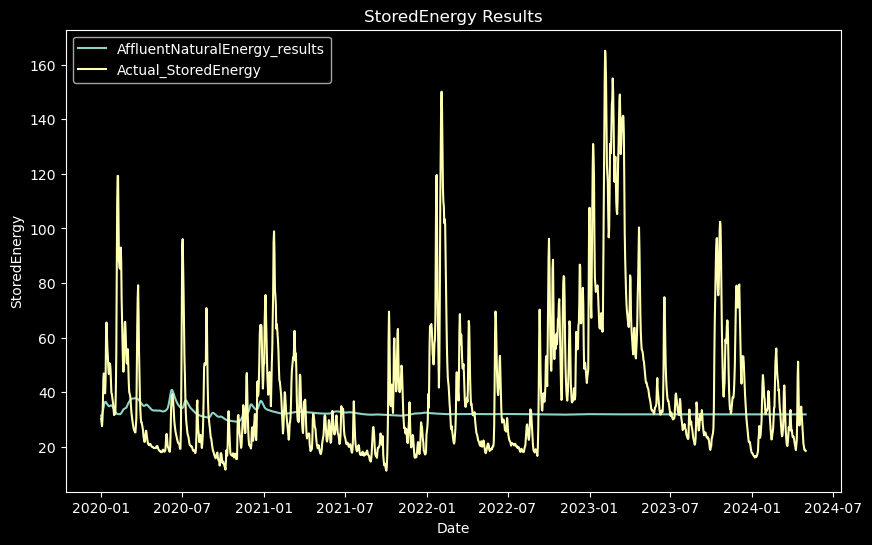

In [216]:
plt.figure(figsize=(10, 6))
plt.plot(sdf_forecasted_jurumirim.index, sdf_forecasted_jurumirim['AffluentNaturalEnergy_results'], label='AffluentNaturalEnergy_results')
plt.plot(sdf_forecasted_jurumirim.index, sdf_forecasted_jurumirim['Actual_AffluentNaturalEnergy'], label='Actual_StoredEnergy')
plt.xlabel('Date')
plt.ylabel('StoredEnergy')
plt.title('StoredEnergy Results')
plt.legend()
plt.show()